In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
os.getcwd()

'/home/matthias/Python/Klimadashboard/App'

# Global Temperature
### Reconstructed from year 1 - 2000

In [3]:
temp_early = pd.read_csv("../Daten/SPM1_1-2000.csv")
temp_early

,year,temp,5%,95%
0,1995,0.65,0.46,0.79
1,1994,0.64,0.46,0.77
2,1993,0.62,0.45,0.76
3,1992,0.61,0.45,0.74
4,1991,0.59,0.44,0.71
...,...,...,...,...
1986,9,0.10,-0.11,0.38
1987,8,0.10,-0.11,0.38
1988,7,0.09,-0.11,0.38
1989,6,0.09,-0.12,0.37


<AxesSubplot:xlabel='year'>

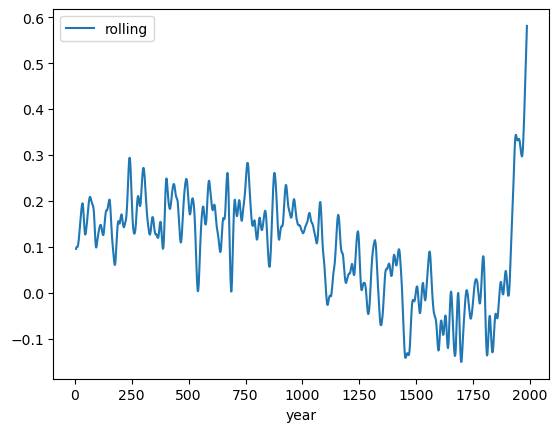

In [4]:
temp_early["rolling"] = temp_early["temp"].rolling(10).mean()
temp_early.plot(x="year",y="rolling")

Text(0.5, 1.0, 'Änderung der Oberflächentemperatur bezogen auf den Jahrzehntedurchschnitt (rekonstruiert)')

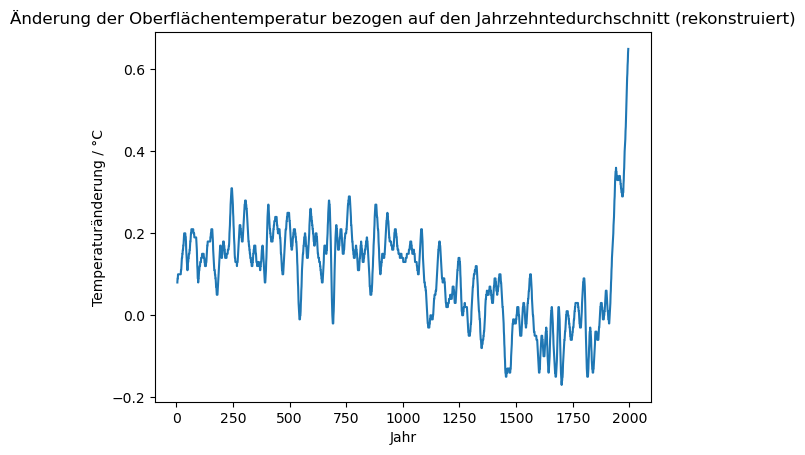

In [5]:
plt.style.use('default')
#sns.set_theme()
plt.plot(temp_early["year"], temp_early["temp"])
plt.xlabel("Jahr")
plt.ylabel("Temperaturänderung / °C")
plt.title("Änderung der Oberflächentemperatur bezogen auf den Jahrzehntedurchschnitt (rekonstruiert)")

## Gemessene Temperaturänderung seit 1850

In [6]:
colnames = ["year", "human_natural", "human_natural_top", "human_natural_bottom", "natural", "natural_top", "natural_bottom", "observed" ]
temp_recent = pd.read_csv("../Daten/gmst_changes_model_and_obs.csv", skiprows=36, skipfooter=1, names=colnames, header=None, engine="python")
temp_recent

,year,human_natural,human_natural_top,human_natural_bottom,natural,natural_top,natural_bottom,observed
0,1850,-0.047589,-0.354805,0.189713,0.014602,-0.161195,0.196198,-0.059
1,1851,-0.058761,-0.313445,0.149283,0.024195,-0.132961,0.179928,0.049
2,1852,-0.002935,-0.174406,0.198393,0.052558,-0.202666,0.221706,0.079
3,1853,-0.005929,-0.214802,0.217604,0.029406,-0.266416,0.178987,0.046
4,1854,-0.026611,-0.224447,0.221410,-0.009961,-0.255841,0.152485,0.049
...,...,...,...,...,...,...,...,...
165,2015,1.042083,0.525009,1.743674,0.056505,-0.216157,0.350697,1.149
166,2016,1.057188,0.507333,1.744812,0.048938,-0.268107,0.290533,1.264
167,2017,1.100092,0.727634,1.781020,0.047106,-0.201490,0.319119,1.179
168,2018,1.170450,0.806942,1.872942,0.044185,-0.222528,0.383822,1.101


In [7]:
fig_temp = px.line(data_frame=temp_recent, x="year", y="observed",
 labels={"year":"Jahr","observed":"Temperaturänderung / °C"},
  title="Jährliche Änderung der globalen Oberflächentemperatur relativ zum Zeitraum 1850-1900",width=800)
fig_temp.update_layout(xaxis_range=[1850,2023],yaxis_range=[-0.5,1.5])
fig_temp.show()

# CO2 Konzentration in der Atmosphäre 
## Gemessene Konzentration

In [8]:
ghg_observed = pd.read_csv("../Daten/table_A3.1_historical_abundances.csv", skiprows=37, skipfooter=1,encoding="unicode_escape", usecols=["YYYY", "CO2", "CH4", "N2O"], engine="python")
ghg_observed.rename(columns={"YYYY":"year","CO2":"co2","CH4":"ch4","N2O":"n2o"}, inplace=True)
ghg_observed

,year,co2,ch4,n2o
0,1750,278.3,729.2,270.1
1,1850,285.5,807.6,272.1
2,1851,285.6,807.8,272.2
3,1852,285.8,808.5,272.3
4,1853,285.9,809.8,272.4
...,...,...,...,...
166,2015,399.4,1834.0,328.3
167,2016,402.9,1842.2,329.1
168,2017,405.0,1849.2,330.0
169,2018,407.4,1857.8,331.2


Text(0, 0.5, 'CO2-Konzentration / ppm')

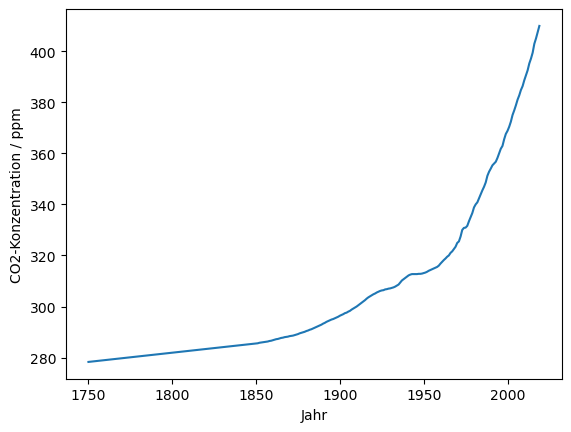

In [9]:
plt.plot(ghg_observed["year"], ghg_observed["co2"])
plt.xlabel("Jahr")
plt.ylabel("CO2-Konzentration / ppm")


## Prognostizierte Verläufe der CO2 Konzetration je nach Szenario

In [10]:
co2_projections = pd.read_excel("../Daten/IPCC_AR6_AnnexIII_Tab2_future_co2_concentration.xlsx")
co2_projections

,year,co2_ssp119,co2_ssp126,co2_ssp245,co2_ssp370,co2_ssp585
0,2020,414,414,414,415,415
1,2030,434,440,444,451,452
2,2040,440,458,475,493,500
3,2050,438,469,507,541,563
4,2060,431,474,537,593,643
5,2070,424,473,564,652,744
6,2080,415,467,585,716,864
7,2090,405,457,598,787,998
8,2100,394,446,603,867,1135


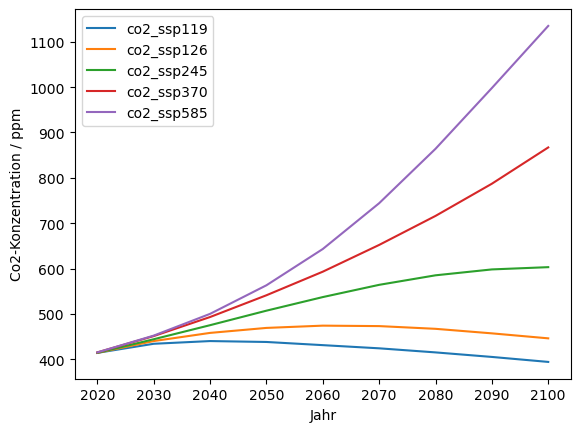

In [11]:
co2_projections_ssps = ['co2_ssp119', 'co2_ssp126', 'co2_ssp245', 'co2_ssp370',
       'co2_ssp585']
for ssp in co2_projections_ssps:
    plt.plot(co2_projections["year"],co2_projections[ssp], label = ssp)

plt.xlabel("Jahr")
plt.ylabel("Co2-Konzentration / ppm")
plt.legend()

In [12]:
fig = px.line(data_frame=co2_total,x="year",y=["ssp119",'ssp126', 'ssp245', 'ssp370',
       'ssp585',"CO2 gemessen"], labels={"value":"CO2 Konzentration / ppm","year":"Jahr","variable":""})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x")

NameError: name 'co2_total' is not defined

In [15]:
concentration

,year,gemessen,ch4,n2o,SSP 1-1.9,SSP 1-2.6,SSP 2-4.5,SSP 3-7.0,SSP 5-8.5
0,1850,285.5,807.6,272.1,NaN,NaN,NaN,NaN,NaN
1,1851,285.6,807.8,272.2,NaN,NaN,NaN,NaN,NaN
2,1852,285.8,808.5,272.3,NaN,NaN,NaN,NaN,NaN
3,1853,285.9,809.8,272.4,NaN,NaN,NaN,NaN,NaN
4,1854,286.0,811.1,272.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
174,2060,NaN,NaN,NaN,431.0,474.0,537.0,593.0,643.0
175,2070,NaN,NaN,NaN,424.0,473.0,564.0,652.0,744.0
176,2080,NaN,NaN,NaN,415.0,467.0,585.0,716.0,864.0
177,2090,NaN,NaN,NaN,405.0,457.0,598.0,787.0,998.0


<AxesSubplot:xlabel='year', ylabel='gemessen'>

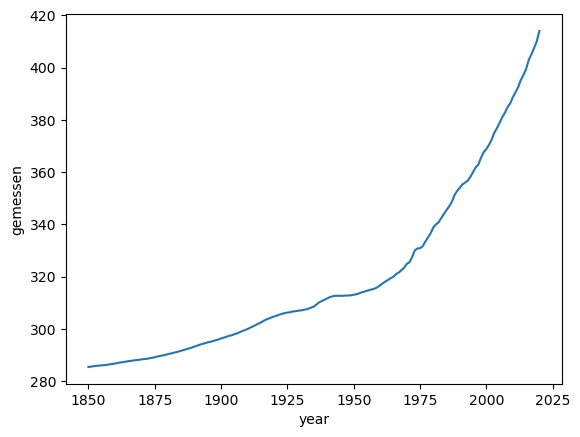

In [26]:
concentration = pd.read_csv("data/co2_concentration_total.csv")
sns.lineplot(data=concentration,x="year",y="gemessen")

Text(0, 0.5, 'CO2 Konzentration / ppm')

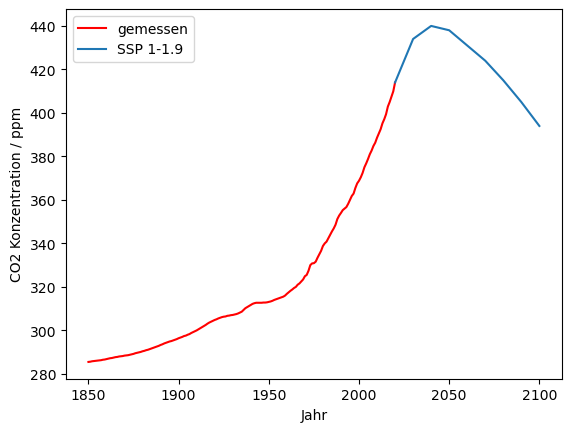

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(concentration["year"],concentration["gemessen"],color="red",label="gemessen")
ax.plot(concentration["year"],concentration["SSP 1-1.9"],label="SSP 1-1.9")
ax.legend()
ax.set_xlabel("Jahr")
ax.set_ylabel("CO2 Konzentration / ppm")

In [27]:
fig = px.line(data_frame=concentration, x="year",y=["gemessen","SSP 1-1.9"])
fig.show()

In [ ]:
ghg_observed = pd.read_csv("../Daten/table_A3.1_historical_abundances.csv", skiprows=37, skipfooter=1,encoding="unicode_escape", usecols=["YYYY", "CO2", "CH4", "N2O"], engine="python")
ghg_observed.rename(columns={"YYYY":"year","CO2":"CO2 gemessen","CH4":"ch4","N2O":"n2o"}, inplace=True)

co2_projections = pd.read_excel("../Daten/IPCC_AR6_AnnexIII_Tab2_future_co2_concentration.xlsx")
co2_projections.rename(columns={"co2_ssp119":"ssp119","co2_ssp126":"ssp126","co2_ssp245":"ssp245","co2_ssp370":"ssp370","co2_ssp585":"ssp585"},inplace=True)

co2_total = pd.merge(left=ghg_observed,right=co2_projections,on="year",how="outer")
co2_total.loc[co2_total["year"]==2020,"CO2 gemessen"] = 414

co2_total

,year,CO2 gemessen,ch4,n2o,ssp119,ssp126,ssp245,ssp370,ssp585
0,1750,278.3,729.2,270.1,NaN,NaN,NaN,NaN,NaN
1,1850,285.5,807.6,272.1,NaN,NaN,NaN,NaN,NaN
2,1851,285.6,807.8,272.2,NaN,NaN,NaN,NaN,NaN
3,1852,285.8,808.5,272.3,NaN,NaN,NaN,NaN,NaN
4,1853,285.9,809.8,272.4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
175,2060,NaN,NaN,NaN,431.0,474.0,537.0,593.0,643.0
176,2070,NaN,NaN,NaN,424.0,473.0,564.0,652.0,744.0
177,2080,NaN,NaN,NaN,415.0,467.0,585.0,716.0,864.0
178,2090,NaN,NaN,NaN,405.0,457.0,598.0,787.0,998.0


# CO2 emissions per country

In [15]:
emissions_country = pd.read_excel("../Daten/EDGARv7.0_FT2021_fossil_CO2_booklet_2022.xlsx", sheet_name="fossil_CO2_totals_by_country").dropna()
emissions_country.to_csv("data/emissions_country.csv")
emissions_country

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654035,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CO2,ZAF,South Africa,185.640021,184.557782,191.212162,208.378907,215.229511,231.208302,245.600945,...,459.783780,471.432912,482.539654,458.824044,458.689488,468.790178,467.184261,470.522116,427.815947,435.522812
208,CO2,ZMB,Zambia,3.670158,3.827327,4.235602,4.549516,4.584571,4.756705,4.757159,...,4.353041,4.560796,4.995499,5.314527,5.783061,7.265927,8.268376,7.084711,6.618359,7.010965
209,CO2,ZWE,Zimbabwe,9.669320,9.616592,9.164476,10.612888,10.303574,9.088979,10.059936,...,12.458577,12.756765,12.647276,12.875895,11.312592,10.540316,12.730372,12.088218,11.443394,12.293227
211,CO2,EU27,EU27,3542.825533,3553.664800,3697.504907,3887.115359,3833.301897,3744.235427,3996.612030,...,3262.094670,3182.700438,3039.771438,3097.973498,3106.408744,3130.214112,3065.688131,2922.049472,2605.119130,2774.926525


Text(0, 0.5, 'Globalee CO2 Emissionen / Gt')

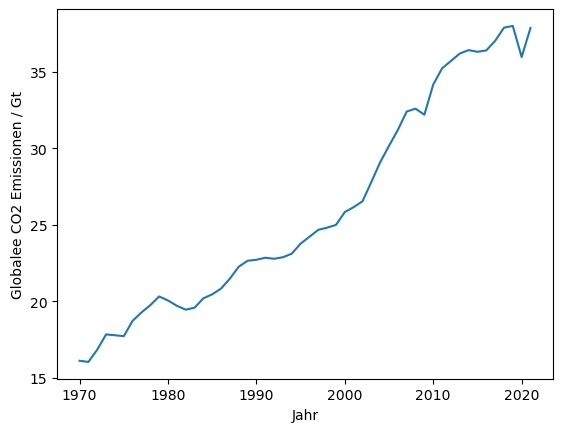

In [16]:
# Create a df with all the global co2 emissions per year 
global_total = emissions_country.loc[emissions_country["Country"]=="GLOBAL TOTAL",1970:].melt(var_name="year",value_name="total_emissions")
global_total["total_emissions"] = global_total["total_emissions"]/1000 #Convert unit from Mt to Gt

# Define a function to get the global co2 emissions of a certain year
def year_global_total_emissions(year):
    return global_total.loc[global_total["year"]==year,"total_emissions"].values[0]

# Plot the global total co2 emissions over time
plt.plot(global_total["year"], global_total["total_emissions"])
plt.xlabel("Jahr")
plt.ylabel("Globalee CO2 Emissionen / Gt")

## CO2 emissions per country per capita

In [17]:
emissions_capita = pd.read_excel("../Daten/EDGARv7.0_FT2021_fossil_CO2_booklet_2022.xlsx",
                                 sheet_name="fossil_CO2_per_capita_by_countr",skipfooter=3).dropna()
emissions_capita.to_csv("data/emissions_capita.csv")
emissions_capita

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,1.386249,1.377678,1.594510,1.653806,1.471866,1.733329,1.585203,...,15.777813,15.396213,15.566530,15.409848,15.060231,12.496750,12.752857,13.079835,10.751174,11.907793
1,CO2,AFG,Afghanistan,0.156348,0.152203,0.146371,0.144899,0.178432,0.161841,0.147963,...,0.333520,0.267372,0.244712,0.247858,0.220335,0.229249,0.250377,0.217225,0.215050,0.214516
2,CO2,AGO,Angola,1.321143,1.232565,1.464238,1.562567,1.583252,1.422773,0.926134,...,0.963765,1.070159,1.129542,1.169955,1.065183,0.877307,0.781454,0.796726,0.702335,0.721368
3,CO2,AIA,Anguilla,0.338637,0.336122,0.348216,0.321684,0.356316,0.389807,0.365537,...,1.841831,1.954019,1.929322,1.916736,1.919526,1.949322,1.875905,1.817582,1.490512,1.693915
5,CO2,ALB,Albania,2.238685,2.186541,2.439749,2.142181,2.255601,2.245509,2.347782,...,1.566529,1.648297,1.757988,1.681673,1.578590,1.824771,1.811292,1.714733,1.599886,1.559482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CO2,WSM,Samoa,0.464206,0.457079,0.480896,0.571587,0.694310,0.569824,0.557814,...,1.453471,1.414304,1.407321,1.604945,1.658657,1.620609,1.565223,1.737568,1.735972,1.783315
206,CO2,YEM,Yemen,0.262898,0.260527,0.300571,0.359195,0.350062,0.327051,0.388369,...,0.882681,1.124740,1.079720,0.529336,0.403081,0.378612,0.360282,0.416091,0.383794,0.389740
207,CO2,ZAF,South Africa,8.128025,7.859275,7.918311,8.392325,8.433890,8.820570,9.128687,...,8.675460,8.768006,8.847510,8.298320,8.188617,8.265397,8.139323,8.103355,7.285541,7.336233
208,CO2,ZMB,Zambia,0.879290,0.886366,0.947562,0.982617,0.956115,0.958240,0.925697,...,0.296125,0.300983,0.319794,0.330095,0.348566,0.425057,0.469527,0.390622,0.354321,0.364490


## Co2 emissions by country per capita

In [19]:
# Create inverted df for country emissions
emissions_country_inverted = emissions_country.drop(emissions_country.tail(1).index).drop("Substance",axis=1).melt(id_vars=["Country","EDGAR Country Code"],var_name="year",value_name="emissions")
# Create inverted df for per capita emissions
emissions_capita_inverted = emissions_capita.drop(emissions_capita.tail(1).index).drop("Substance",axis=1).melt(id_vars=["EDGAR Country Code","Country"], var_name="year",value_name="emissions")
# Merge the two dfs
emissions_inverted_merged = pd.merge(left=emissions_country_inverted, right=emissions_capita_inverted, on=["EDGAR Country Code","Country","year"],suffixes=["_country","_capita"])
# Convert country emissions from Mt to Gt
emissions_inverted_merged["emissions_country"] = emissions_inverted_merged["emissions_country"] / 1000

def calc_cumulated_emissions(row):
    year = row["year"]
    country = row["Country"]

    cumulated_emissions = emissions_inverted_merged.loc[(emissions_inverted_merged["year"]<=year) & (emissions_inverted_merged["Country"]==country),"emissions_country"].sum()
    
    return cumulated_emissions
emissions_inverted_merged["emissions_cumulated"] = emissions_inverted_merged.apply(calc_cumulated_emissions, axis=1)



In [20]:
# Create interactive plotly graph with country over capita emissions
dd_countries = emissions_inverted_merged["Country"].unique().tolist()
fig_country_capita = px.scatter(data_frame=emissions_inverted_merged.loc[emissions_inverted_merged["Country"].isin(dd_countries),:], x="emissions_capita",
                    y="emissions_country", size="emissions_cumulated", animation_frame="year", hover_name="Country",
                    labels={"emissions_country": "CO2 Emissionen pro Land / Gt ", "emissions_capita":'CO2 Emissionen pro Land pro Kopf / t ',"year":"Jahr ",
                     "emissions_cumulated":"Kummulierte Emissionen seit 1970 "},
                     )
fig_country_capita.update_layout(yaxis_range=[-1,12.5],xaxis_range=[0,60])
fig_country_capita.show()
emissions_inverted_merged


,Country,EDGAR Country Code,year,emissions_country,emissions_capita,emissions_cumulated
0,Aruba,ABW,1970,0.000082,1.386249,0.000082
1,Afghanistan,AFG,1970,0.001740,0.156348,0.001740
2,Angola,AGO,1970,0.008953,1.321143,0.008953
3,Anguilla,AIA,1970,0.000002,0.338637,0.000002
4,Albania,ALB,1970,0.004815,2.238685,0.004815
...,...,...,...,...,...,...
10759,Vanuatu,VUT,2021,0.000223,0.743388,0.005848
10760,Samoa,WSM,2021,0.000360,1.783315,0.009103
10761,Yemen,YEM,2021,0.012047,0.389740,0.607459
10762,South Africa,ZAF,2021,0.435523,7.336233,17.855958


In [21]:
def calc_cumulated_emissions(row):
    year = row["year"]
    country = row["Country"]

    cumulated_emissions = emissions_inverted_merged.loc[(emissions_inverted_merged["year"]<=year) & (emissions_inverted_merged["Country"]==country),"emissions_country"].sum()
    
    return cumulated_emissions

In [22]:
emissions_inverted_merged["emissions_cumulated"] = emissions_inverted_merged.apply(calc_cumulated_emissions, axis=1)
emissions_inverted_merged 

,Country,EDGAR Country Code,year,emissions_country,emissions_capita,emissions_cumulated
0,Aruba,ABW,1970,0.000082,1.386249,0.000082
1,Afghanistan,AFG,1970,0.001740,0.156348,0.001740
2,Angola,AGO,1970,0.008953,1.321143,0.008953
3,Anguilla,AIA,1970,0.000002,0.338637,0.000002
4,Albania,ALB,1970,0.004815,2.238685,0.004815
...,...,...,...,...,...,...
10759,Vanuatu,VUT,2021,0.000223,0.743388,0.005848
10760,Samoa,WSM,2021,0.000360,1.783315,0.009103
10761,Yemen,YEM,2021,0.012047,0.389740,0.607459
10762,South Africa,ZAF,2021,0.435523,7.336233,17.855958


In [6]:
import kaleido
import pandas as pd
import plotly.express as px
emissions = pd.read_csv("data/emissions_inverted_merged.csv")
emissions = emissions.loc[emissions["year"] == 2021,:]
emissions = emissions.sort_values(by=["emissions_cumulated"],ascending=False)
emissions = emissions.head(10)
fig_country_capita = px.scatter(data_frame=emissions,
                        x="emissions_capita",
                        y="emissions_country",
                        animation_frame="year",
                        hover_name="Country",
                        size = "emissions_cumulated",
                        color = "Country",
                        color_discrete_sequence=["#ffca03",
                    "#ffa011",
                    "#ff7431",
                    "#ff414c",
                    "#f60066",
                    "#d40080",
                    "#660062",
                    "#330a5c",
                    
                    "#5E0B15",
                    "#90323D"],
                        template="seaborn",
                        labels={"emissions_country": "Land / Gt ",
                                    "emissions_capita":'Land pro Kopf / t ',
                                    "emissions_cumulated":"Kummuliert / Gt",
                                    "year":"Jahr "},
                        hover_data={"emissions_country":":.2f",
                                    "emissions_capita":":.2f",
                                    "emissions_cumulated":":.2f"})
fig_country_capita.update_layout(font_size = 14)
fig_country_capita.write_image("emissions_cumulated_top_ten.svg")
fig_country_capita.show()


<AxesSubplot:xlabel='emissions_country', ylabel='emissions_capita'>

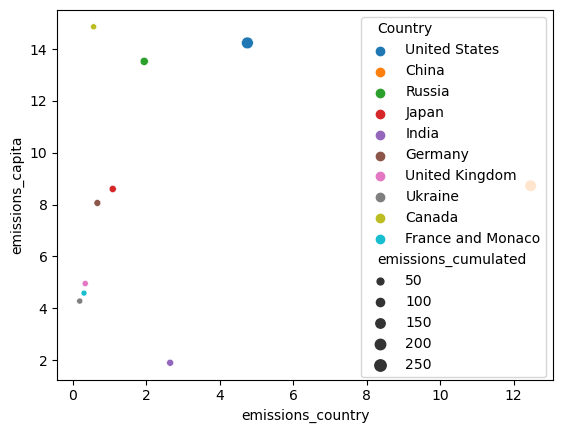

In [11]:
import seaborn as sns
sns.scatterplot(data=emissions, x="emissions_country",y="emissions_capita", hue="Country",size="emissions_cumulated")

In [ ]:
#emissions_inverted_merged.to_csv("data/emissions_inverted_merged.csv")

# CO2-Budget
In this part the remaining CO2-budget will be calculated which still can be emitted before breaking the 1,5°C limit. In the AR6 of IPCC in table SPM.2 the remaining CO2 budget from january 2020 is calculated as 400 Gt CO2 to reach to 1,5° goal with a 67% probability.  
From these 400 Gt the observed global emissions as reported in EDGAR7.0 will be substracted. To calculate the emissions of the time difference between 2021 and now the average global emissions between 2015 and 2021 will be used. Linear emission over time is assumed.

In [ ]:
import datetime as dt 

# Calculate the average global co2 emissions between 2015 and 2021. Year 2020 will not be part of the average because the emissions 
# where quite low due to the covid pandemic
global_avg_15_21 = global_total.loc[global_total["year"].isin([2015,2016,2017,2018,2019,2021]),"total_emissions"].mean()
print("Global average co2 emissions between 2015 an 2021:",round(global_avg_15_21,3),"Gt")

# Emissions of 2020 and 2021
emissions_20_21 = (year_global_total_emissions(2020) + year_global_total_emissions(2021))
print("The total global co2 emissions of 2020 and 2021 are:",round(emissions_20_21,3),"Gt")

# Emissions since january 2022
average_global_co2_per_second = global_avg_15_21/365/24/60/60 * 1000000000  #value in t/s
print("Global average co2 emissions:",round(average_global_co2_per_second),"t/s")
time_since_jan22 = dt.datetime.now() - dt.datetime(2022,1,1)  #Time difference between jan 2020 and now
used_since_jan_22 = time_since_jan22.total_seconds() * average_global_co2_per_second  /1000000000 #Used co2 budget since jan2020 in Gt

# Remaining co2 budget
remaining = 400 - emissions_20_21 - used_since_jan_22    #Remaining co2 budget in Gt
print("Remaining CO2 budget:",round(remaining,3),"Gt")

Global average co2 emissions between 2015 an 2021: 37.239 Gt
The total global co2 emissions of 2020 and 2021 are: 73.818 Gt
Global average co2 emissions: 1181 t/s
Remaining CO2 budget: 290.523 Gt


### Visualization of the remaining CO2 budget since 2020

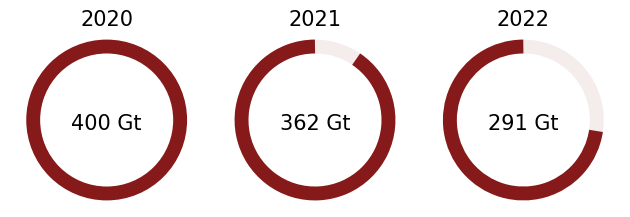

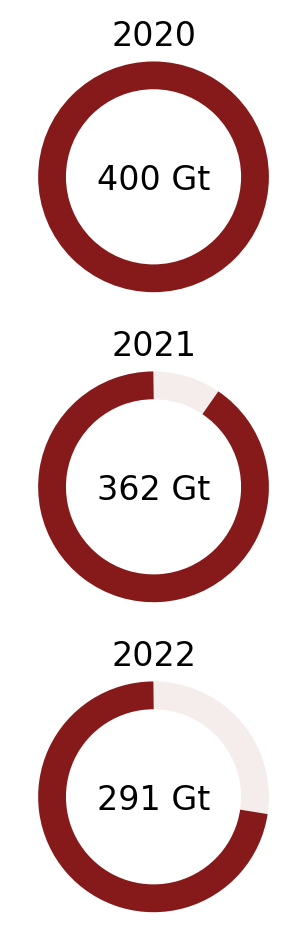

In [ ]:
import matplotlib.patches as mpatches

##############
# Horizontal #
##############
fig, (ax1,ax2,ax3) = plt.subplots(1,3,dpi=100)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

#2020
circle2020=plt.Circle((0.5,0.45),0.38,fill=False, color = "#861919", linewidth=10)
ax1.add_artist(circle2020)
ax1.text(x=0.5,y=0.4,s="400 Gt", horizontalalignment="center", fontsize=15)
ax1.text(x=0.5,y=0.94,s="2020",fontsize=15,horizontalalignment="center")

#2021
circle2021=plt.Circle((0.5,0.45),0.38,fill=False, color = "#861919", linewidth=10,
                        alpha=.08)
ax2.add_artist(circle2021)

# Calculate a correspoding angle to the remaining co2 budget to visualize the 
# emissions since 2020
# 400 Gt -> 360°
# x Gt   -> 360° / 400 * x
remaining_2021 = 400 - year_global_total_emissions(2021)
remaining_angle_2021 = 360/400*remaining_2021
arc_2021 = mpatches.Arc(xy=(0.5,0.45),width=0.76,height=0.76,theta1=0,
                theta2=remaining_angle_2021,angle=90, color="#861919",linewidth=10)
ax2.add_artist(arc_2021)

ax2.text(x=0.5,y=0.4,s=(str(round(remaining_2021))+" Gt"),horizontalalignment="center",
        fontsize=15)
ax2.text(x=0.5,y=0.94,s="2021",fontsize=15,horizontalalignment="center")


# 2022
remaining_angle_2022 = 360 / 400 * remaining

circle2022=plt.Circle((0.5,0.45),0.38,fill=False, color = "#861919", linewidth=10,
                        alpha=.08)
ax3.add_artist(circle2022)

arc_2022 = mpatches.Arc(xy=(0.5,0.45),width=0.76,height=0.76,theta1=0,
                theta2=remaining_angle_2022,angle=90, color="#861919",linewidth=10)
ax3.add_artist(arc_2022)

ax3.text(x=0.5,y=0.4,s=(str(round(remaining))+" Gt"),horizontalalignment="center",
fontsize=15)
ax3.text(x=0.5,y=0.94,s="2022",fontsize=15,horizontalalignment="center")

ax1.set_aspect(1)    # Set the aspect ratio
ax2.set_aspect(1) 
ax3.set_aspect(1) 
fig.tight_layout()

#############
# Vertical #
############
fig, (ax1,ax2,ax3) = plt.subplots(3,1,dpi=200)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

#2020
circle2020=plt.Circle((0.5,0.45),0.38,fill=False, color = "#861919", linewidth=10)
ax1.add_artist(circle2020)
ax1.text(x=0.5,y=0.4,s="400 Gt", horizontalalignment="center", fontsize=12)
ax1.text(x=0.5,y=0.94,s="2020",fontsize=12,horizontalalignment="center")

#2021
circle2021=plt.Circle((0.5,0.45),0.38,fill=False, color = "#861919", linewidth=10,
                        alpha=.08)
ax2.add_artist(circle2021)

remaining_2021 = 400 - year_global_total_emissions(2021)
remaining_angle_2021 = 360/400*remaining_2021
arc_2021 = mpatches.Arc(xy=(0.5,0.45),width=0.76,height=0.76,theta1=0,
                theta2=remaining_angle_2021,angle=90, color="#861919",linewidth=10)
ax2.add_artist(arc_2021)

ax2.text(x=0.5,y=0.4,s=(str(round(remaining_2021))+" Gt"),horizontalalignment="center",
fontsize=12)
ax2.text(x=0.5,y=0.94,s="2021",fontsize=12,horizontalalignment="center")

# 2022
remaining_angle_2022 = 360 / 400 * remaining

circle2022=plt.Circle((0.5,0.45),0.38,fill=False, color = "#861919",
                     linewidth=10,alpha=.08)
ax3.add_artist(circle2022)

arc_2022 = mpatches.Arc(xy=(0.5,0.45),width=0.76,height=0.76,theta1=0,
                theta2=remaining_angle_2022,angle=90, color="#861919",linewidth=10)
ax3.add_artist(arc_2022)

ax3.text(x=0.5,y=0.4,s=(str(round(remaining))+" Gt"),horizontalalignment="center",
fontsize=12)
ax3.text(x=0.5,y=0.94,s="2022",fontsize=12,horizontalalignment="center")

ax1.set_aspect(1)    
ax2.set_aspect(1) 
ax3.set_aspect(1) 
fig.tight_layout()

## Plotly gauge chart for CO2 budget

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Create a df with the emissions per month and the remaining budget in this month
# The values for the years 2020 and 2021 are fetched from the emissions dataset while the 
# predicition for the upcoming months/years are calculated with the average from 2015 to 2021.

import locale
locale.setlocale(locale.LC_TIME, "de_DE.UTF-8")

budget = pd.DataFrame()
budget["date"] = pd.date_range("2020-01-01",periods=180, freq="MS")

# Assign the measured emissions of 2020 and 2021 to these years
emissions_per_month_2020 = year_global_total_emissions(2020)/12
emissions_per_month_2021 = year_global_total_emissions(2021)/12
budget.loc[budget["date"].dt.year==2020,"emissions"] = emissions_per_month_2020
budget.loc[budget["date"].dt.year==2021,"emissions"] = emissions_per_month_2021

# Add first row with 0 emissions on 01.01.2020
#first_row = pd.DataFrame([[dt.datetime(2020,1,1),0]],columns=["date","emissions"])
#budget = pd.concat([first_row,budget]).reset_index(drop=True)

budget["year"] = budget["date"].dt.year
budget["month"] = budget["date"].dt.strftime("%B")

budget = budget[["date","year","month","emissions"]]

# Calculate average emissions from 2015 to 2021 except 2020
global_avg_15_21 = global_total.loc[global_total["year"].isin([2015,2016,2017,2018,2019,2021]),"total_emissions"].mean()
emissions_per_month_prediction = global_avg_15_21/12

# Assign the future, extrapolated emissions to all months in the df
budget.loc[~budget["date"].dt.year.isin([2020,2021]),"emissions"] = emissions_per_month_prediction

# Function to calculate the remaining co2 budget per row
def calc_remaining_budget(row):

    # Get index of current row    
    this_budget_index = budget.loc[budget["date"]==row["date"]].index[0]
    
    # Get cumulated emissions until but not including the current month
    cumulated_emissions = budget.loc[0:this_budget_index-1,"emissions"].sum()
       
    remaining_budget = 400 - cumulated_emissions
    
    if remaining_budget < 0:
        remaining_budget = 0

    return remaining_budget

#Calculate the remaining budget
budget["remaining"] = budget.apply(calc_remaining_budget, axis=1)

#budget.to_csv("data/emissions_gauge.csv")

budget

,date,year,month,emissions,remaining
0,2020-01-01,2020,Januar,2.996723,400.000000
1,2020-02-01,2020,Februar,2.996723,397.003277
2,2020-03-01,2020,März,2.996723,394.006554
3,2020-04-01,2020,April,2.996723,391.009831
4,2020-05-01,2020,Mai,2.996723,388.013109
...,...,...,...,...,...
175,2034-08-01,2034,August,3.103281,0.000000
176,2034-09-01,2034,September,3.103281,0.000000
177,2034-10-01,2034,Oktober,3.103281,0.000000
178,2034-11-01,2034,November,3.103281,0.000000


In [ ]:
emissions = pd.read_csv("/home/matthias/Python/Klimadashboard/Analysis/data/emissions_inverted_merged.csv")
#emissions.sort_values(by=["emissions_capita"])
emissions

,Unnamed: 0,Country,EDGAR Country Code,year,emissions_country,emissions_capita,emissions_cumulated
0,0,Aruba,ABW,1970,0.000082,1.386249,0.000082
1,1,Afghanistan,AFG,1970,0.001740,0.156348,0.001740
2,2,Angola,AGO,1970,0.008953,1.321143,0.008953
3,3,Anguilla,AIA,1970,0.000002,0.338637,0.000002
4,4,Albania,ALB,1970,0.004815,2.238685,0.004815
...,...,...,...,...,...,...,...
10759,10759,Vanuatu,VUT,2021,0.000223,0.743388,0.005848
10760,10760,Samoa,WSM,2021,0.000360,1.783315,0.009103
10761,10761,Yemen,YEM,2021,0.012047,0.389740,0.607459
10762,10762,South Africa,ZAF,2021,0.435523,7.336233,17.855958


In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=e, x="emissions_capita",y="emissions_country",color="Country",size="emissions_cumulated")
fig.show()